# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Anandito Satria Asyraf]
- **Email:** [ananditosatriaa181@gmail.com]
- **ID Dicoding:** [anandito38]

## Menentukan Pertanyaan Bisnis



*   Bagaimana pola penggunaan sepeda berdasarkan jam (rentang jam), hari kerja (workingday), hari libur (holiday), dan jenis hari (weekday)?
*   Dalam rentang waktu satu tahun, bagaimana perbandingan tren penggunaan sepeda antara tahun 2011 dan tahun 2012?
*   Bagaimana hubungan antara suhu, suhu yang dirasakan, kelembaban udara, dan jumlah pengguna sepeda (baik casual maupun registered)?
*   Apakah ada pola penggunaan sepeda yang dipengaruhi oleh musim, baik itu oleh pengguna sepeda casual maupun yang terdaftar (registered)?




## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

Pada tahap Data Wrangling, saya memilih **Bike Sharing Dataset** dengan mengimpor file **day.csv** dan **hour.csv**

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

### Assessing Data

In [3]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Didapatkan informasi bahwa rentang tahun adalah dari **2011 - 2012** baik dari data **hour** ataupun **day**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari data day ataupun hour didapatkan informasi bahwa sama sama **tidak memiliki missing value**, tetapi masih terdapat **satu kolom** yang memiliki tipe data yang **salah**, yaitu **dteday** yang semula object yang harusnya **datetime**

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan informasi **describe** data **day_df** dan **hour_df** diatas, kita mengetahui tidak ada **keanehan** pada **nilai statistiknya**

In [11]:
print("Jumlah duplikasi pada dataFrame day:", day_df.duplicated().sum())
print("Jumlah duplikasi pada dataFrame hour:", hour_df.duplicated().sum())

Jumlah duplikasi pada dataFrame day: 0
Jumlah duplikasi pada dataFrame hour: 0


Berdasarkan informasi diatas didapatkan informasi bahwa **tidak** terdapat data yang bersifat **unik**

### Cleaning Data

1. Menghapus data tabel yang tidak diperlukan

Saya akan menghapus dahulu data tabel **day**, karena data set pada data day dan hour **sebetulnya sama** dan pada hour itu terdapat **penambahan** satu kolom **hr**nya saja, selebihnya **sama persis**.

In [12]:
del day_df

2. Menghapus kolom yang tidak digunakan

Berdasarkan pertanyaan bisnis yang sudah saya buat, maka untuk kolom yang akan tidak digunakan (drop) yaitu:



*   windspeed : Tidak ada pertanyaan bisnis terkait yang akan berefek berdasarkan kecepatan angin dan jumlah sepeda
*   weathersit : Tidak ada pertanyaan bisnis terkait yang akan berefek berdasarkan cuaca dan jumlah sepeda
*   instant : Disini instant sebagai indeks catatan yang tidak memberikan informasi khusus



In [13]:
drop = ['instant','windspeed', 'weathersit']

for i in hour_df.columns:
  if i in drop:
    hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,0.75,0,1,1


3. Mengubah beberapa informasi pada kolom

Karena beberapa informasi yang diberikan pada beberapa kolom kurang sesuai dengan pemahaman pengguna, maka saya rubah. Dan saya rasa lebih mudah memahami data dengan bentuk kategorikal, sehingga beberapa data seperti season, month, weekday, year

In [14]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hr': 'hour'
}, inplace=True)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,0.75,0,1,1


In [15]:
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Ags', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})

hour_df['season'] = hour_df['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})

hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})


In [16]:
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])


In [17]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,temp,atemp,hum,casual,registered,count
0,2011-01-01,Semi,2011,Jan,0,0,Sabtu,0,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Semi,2011,Jan,1,0,Sabtu,0,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Semi,2011,Jan,2,0,Sabtu,0,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Semi,2011,Jan,3,0,Sabtu,0,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Semi,2011,Jan,4,0,Sabtu,0,0.24,0.2879,0.75,0,1,1


In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  category      
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  count       17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.2 MB


## Exploratory Data Analysis (EDA)

### Explore Data hour_df

1. Kelompokkan penyewa sepeda (casual dan registered) berdasarkan bulan

In [19]:
hour_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
        max min        mean     sum
month                              
Ags     941   1  238.097627  351194
Apr     822   1  187.260960  269094
Des     759   1  142.303439  211036
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     913   1  231.819892  344948
Jun     900   1  240.515278  346342
Mar     957   1  155.410726  228920
Mei     873   1  222.907258  331686
Nov     729   1  177.335421  254831
Okt     963   1  222.158511  322352
Sep     977   1  240.773138  345991

Berdasarkan informasi diatas, dapat disimpulkan jika bulan dengan penyewa sepeda yang memiliki jumlah **terbanyak** adalah **Juni** dan memiliki **rata-rata terkecil** dan **jumlah terkecil** adalah bulan **Januari**

2. Kelompokkan penyewa sepeda (casual dan registered) berdasarkan holiday

In [20]:
hour_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
          max min       mean      sum
holiday                              
0         977   1  190.42858  3214244
1         712   1  156.87000    78435

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda lebih banyak digunakan saat **hari biasa**, sedangkan pada **hari-hari libur** lebih **sedikit**.

3. Kelompokkan penyewa sepeda (casual dan registered) berdasarkan weekday

In [21]:
hour_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
          max min        mean     sum
weekday                              
Jumat     957   1  196.135907  487790
Kamis     976   1  196.436665  485395
Minggu    776   1  177.468825  444027
Rabu      977   1  191.130505  473048
Sabtu     783   1  190.209793  477807
Selasa    970   1  191.238891  469109
Senin     968   1  183.744655  455503

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda **paling banyak** beraktifitas pada hari **Jumat**, dan **paling sedikit** pada hari **Minggu**

4. Kelompokkan penyewa sepeda (casual dan registered) dengan workingday

In [22]:
hour_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
             max min        mean      sum
workingday                               
0            783   1  181.405332  1000269
1            977   1  193.207754  2292410

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda paling banyak pada **hari kerja** dibandingkan dengan hari **bukan hari kerja**.

5. Kelompokkan penyewa sepeda (casual dan registered) dengan musim

In [23]:
hour_df.groupby(by='season').agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

casual  registered count                         
             mean        mean   max min        mean      sum
season                                                      
Dingin  30.666824  168.202032   967   1  198.868856   841613
Gugur   50.287144  185.729093   977   1  236.016237  1061129
Panas   46.160581  162.183488   957   1  208.344069   918589
Semi    14.290901   96.823668   801   1  111.114569   471348

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda paling **banyak** beraktifitas pada **musim Gugur** dibandingkan dengan **musim Semi** yang paling **sedikit**. Dan didapatkan penyewa sepeda **casual** rata-rata aktif pada **musim Gugur** sedangkan penyewa sepeda yang **terdaftar** aktif pada **musim Gugur** juga.


6. Kelompokkan temp, atemp, humidity berdasarkan musim

In [24]:
hour_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean', 'sum'],
    'atemp': ['max', 'min', 'mean', 'sum'],
    'hum': ['max', 'min', 'mean', 'sum']
})

temp                            atemp                               \
         max   min      mean      sum     max     min      mean        sum   
season                                                                       
Dingin  0.76  0.14  0.423138  1790.72  0.6818  0.1515  0.415738  1759.4021   
Gugur   1.00  0.38  0.706410  3176.02  1.0000  0.2424  0.656004  2949.3918   
Panas   0.94  0.16  0.544663  2401.42  0.8788  0.1667  0.520547  2295.0915   
Semi    0.72  0.02  0.299147  1268.98  0.6515  0.0000  0.298116  1264.6101   

        hum                           
        max   min      mean      sum  
season                                
Dingin  1.0  0.16  0.667124  2823.27  
Gugur   1.0  0.16  0.633167  2846.72  
Panas   1.0  0.16  0.627022  2764.54  
Semi    1.0  0.00  0.581348  2466.08

Berdasarkan informasi diatas, dapat disimpulkan beberapa pernyataan yaitu:


*   Rata-rata temperatur dan atemp tertinggi terjadi pada musim Gugur, yang selanjutnya diikuti dengan panas, dingin, semi.
*   Rata-rata humidity tertinggi terjadi pada musim Dingin yang selanjutnya diikuti dengan gugur, panas, semi.



7. Kelompokkan penyewa sepeda (casual dan registered) dengan tahun

In [25]:
hour_df.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
       max min        mean      sum
year                               
2011   651   1  143.794448  1243103
2012   977   1  234.666361  2049576

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda paling banyak beraktifitas pada tahun **2012** dibandingkan dengan tahun **2011**.

8. Kelompokkan penyewa sepeda (casual dan registered) dengan Jam

In [26]:
hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

Berdasarkan informasi diatas, dapat disimpulkan penyewa sepeda **paling banyak** beraktifitas pada **jam 17.00 (5 Sore)**, sedangkan **paling sedikit** pada jam **04.00 (4 Pagi)**.

9. Hubungan antara penyewa sepeda casual, registered, temp, atemp, hum, dan count

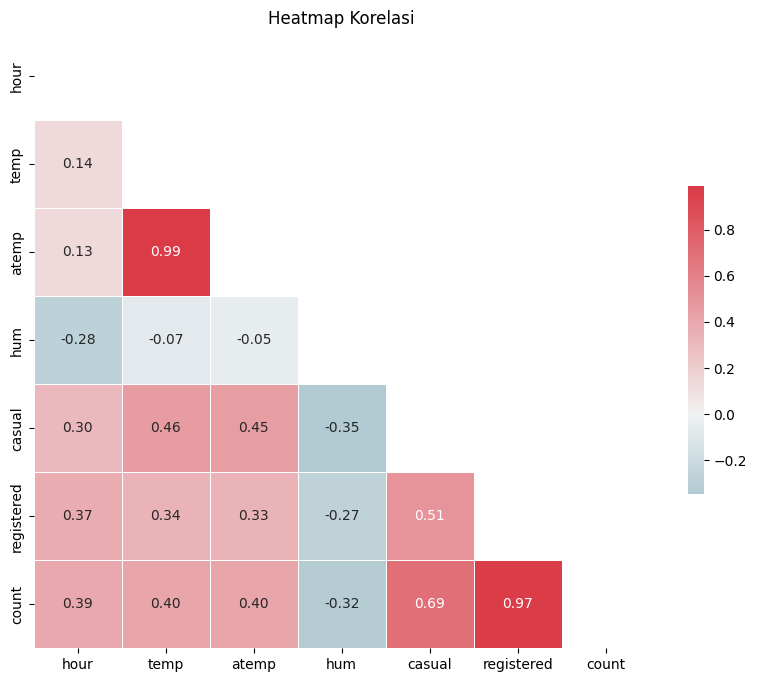

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap=cmap,
    center=0,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns)

plt.title("Heatmap Korelasi")
plt.show()

Berdasarkan informasi diatas, didapatkan beberapa pernyataan yaitu:


*   temp dan atemp berkolerasi tinggi (0.99).
*   hum berkolerasi rendah dengan temp dan atemp (-0.07 dan -0.05)
*   casual cukup berkolerasi kuat dengan temp dan atemp (0.46 dan 0.45), dengan negatif hum (-0.35).
*   registered kurang cukup berkolerasi kuat dengan temp dan atemp (0.34 dan 0.33) dengan kolerasi lebih rendah daripada casual, dengan  hum (-0.27)
*   count dan registered berkolerasi tinggi (0.97)
*   count dan casual berkolerasi cukup kuat (0.69)
*   count kurang cukup berkolerasi kuat dengan hour, temp, dan atemp (0.39, 0.40, 0.40)




## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan jam (rentang jam), hari kerja (workingday), hari libur (holiday), dan jenis hari (weekday)?

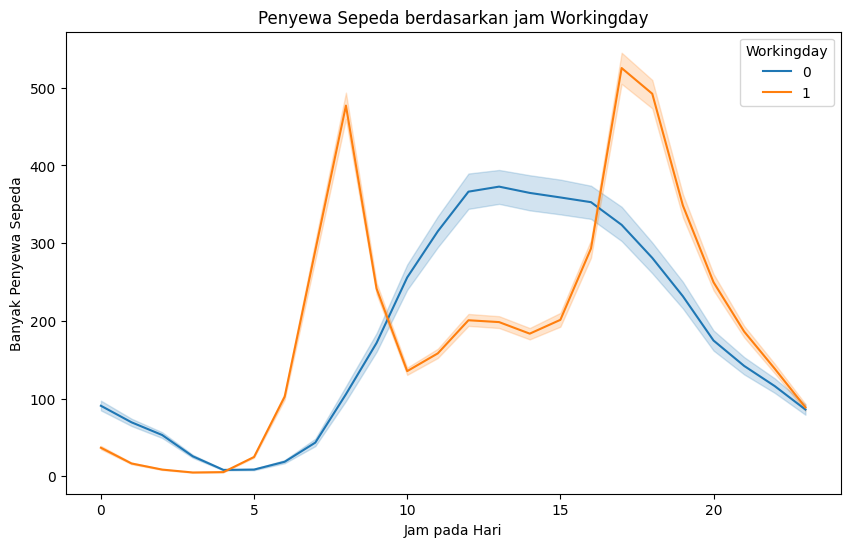

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='workingday', data=hour_df)

plt.xlabel('Jam pada Hari')
plt.ylabel('Banyak Penyewa Sepeda')
plt.title('Penyewa Sepeda berdasarkan jam Workingday')

plt.legend(title='Workingday')
plt.show()

Berdasarkan visualisasi data menggunakan lineplot, dapat disimpulkan bahwa pada **hari kerja** memiliki penyewa sepeda yang tinggi pada sekitar jam 08:00 dan 17:00, namun sedikit pada jam rentang jam 10:00 hingga 15:00, sedangkan pada **hari bukan kerja** memiliki penyewa sepeda yang cukup tinggi pada rentang jam 12.00 hinga 15.00.

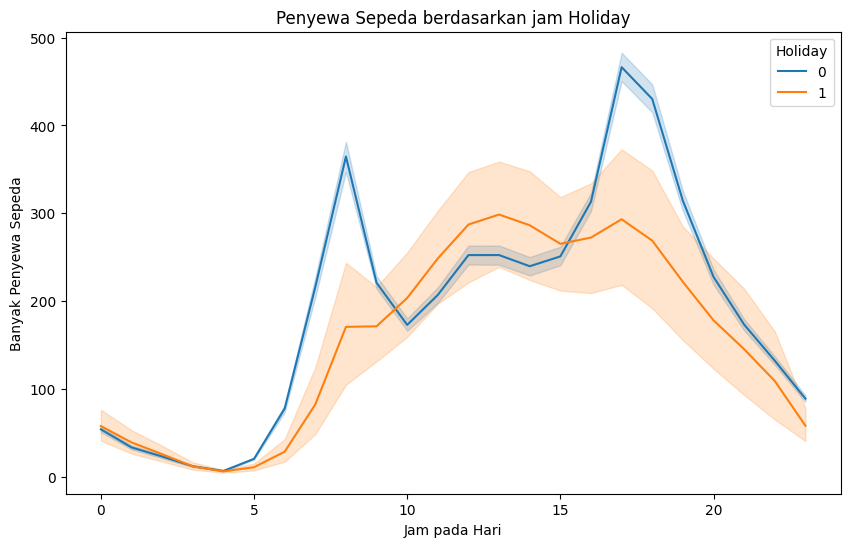

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='holiday', data=hour_df)

plt.xlabel('Jam pada Hari')
plt.ylabel('Banyak Penyewa Sepeda')
plt.title('Penyewa Sepeda berdasarkan jam Holiday')

plt.legend(title='Holiday')
plt.show()

Berdasarkan visualisasi data menggunakan lineplot, dapat disimpulkan bahwa pada hari bukan libur memiliki penyewa sepeda yang tinggi pada jam 08:00 dan 17:00, sedangkan pada hari libur memiliki penyewa sepeda yang tinggi pada jam 17:00.

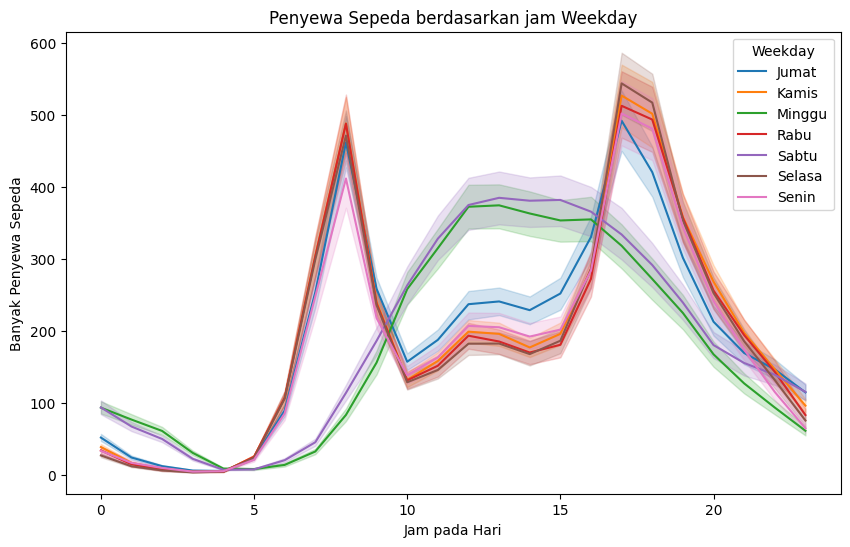

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='weekday', data=hour_df)

plt.xlabel('Jam pada Hari')
plt.ylabel('Banyak Penyewa Sepeda')
plt.title('Penyewa Sepeda berdasarkan jam Weekday')

plt.legend(title='Weekday')
plt.show()

Berdasarkan visualisasi data menggunakan lineplot, dapat disimpulkan bahwa pada hari senin, selasa, rabu, kamis, jumat memiliki penyewa sepeda yang tinggi pada jam 08:00 dan 17:00 hingga 18:00, sedangkan pada hari sabtu dan minggu memiliki penyewa sepeda yang tinggi pada jam 12:00 hingga 14:00.

### Pertanyaan 2: Dalam rentang waktu satu tahun, bagaimana perbandingan tren penggunaan sepeda antara tahun 2011 dan tahun 2012?

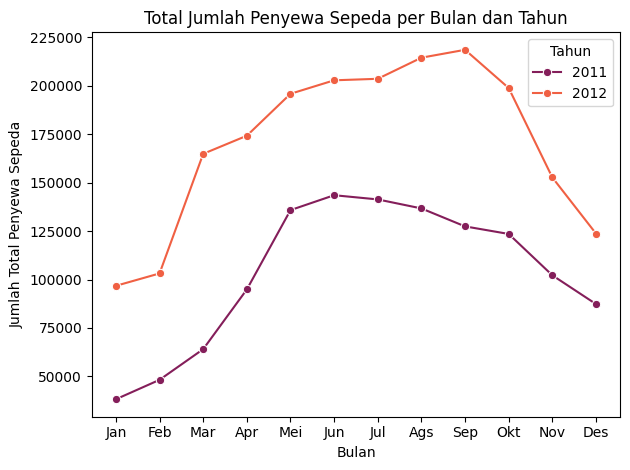

In [31]:
hour_df['month'] = pd.Categorical(hour_df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'], ordered=True)

monthly_counts = hour_df.groupby(by=["month", "year"]).agg({"count": "sum"}).reset_index()
sns.lineplot(data=monthly_counts, x="month", y="count", hue="year",
             palette="rocket", marker="o")

plt.title("Total Jumlah Penyewa Sepeda per Bulan dan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Total Penyewa Sepeda")

plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 memiliki penyewa sepeda yang lebih banyak atau unggul daripada 2011 dari bulan januari hingga bulan desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan september, sementara yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan juni dan memiliki penyewaan tersepi pada bulan januari.

### Pertanyaan 3: Bagaimana hubungan antara suhu, suhu yang dirasakan, kelembaban udara, dan jumlah pengguna sepeda (baik casual maupun registered)?

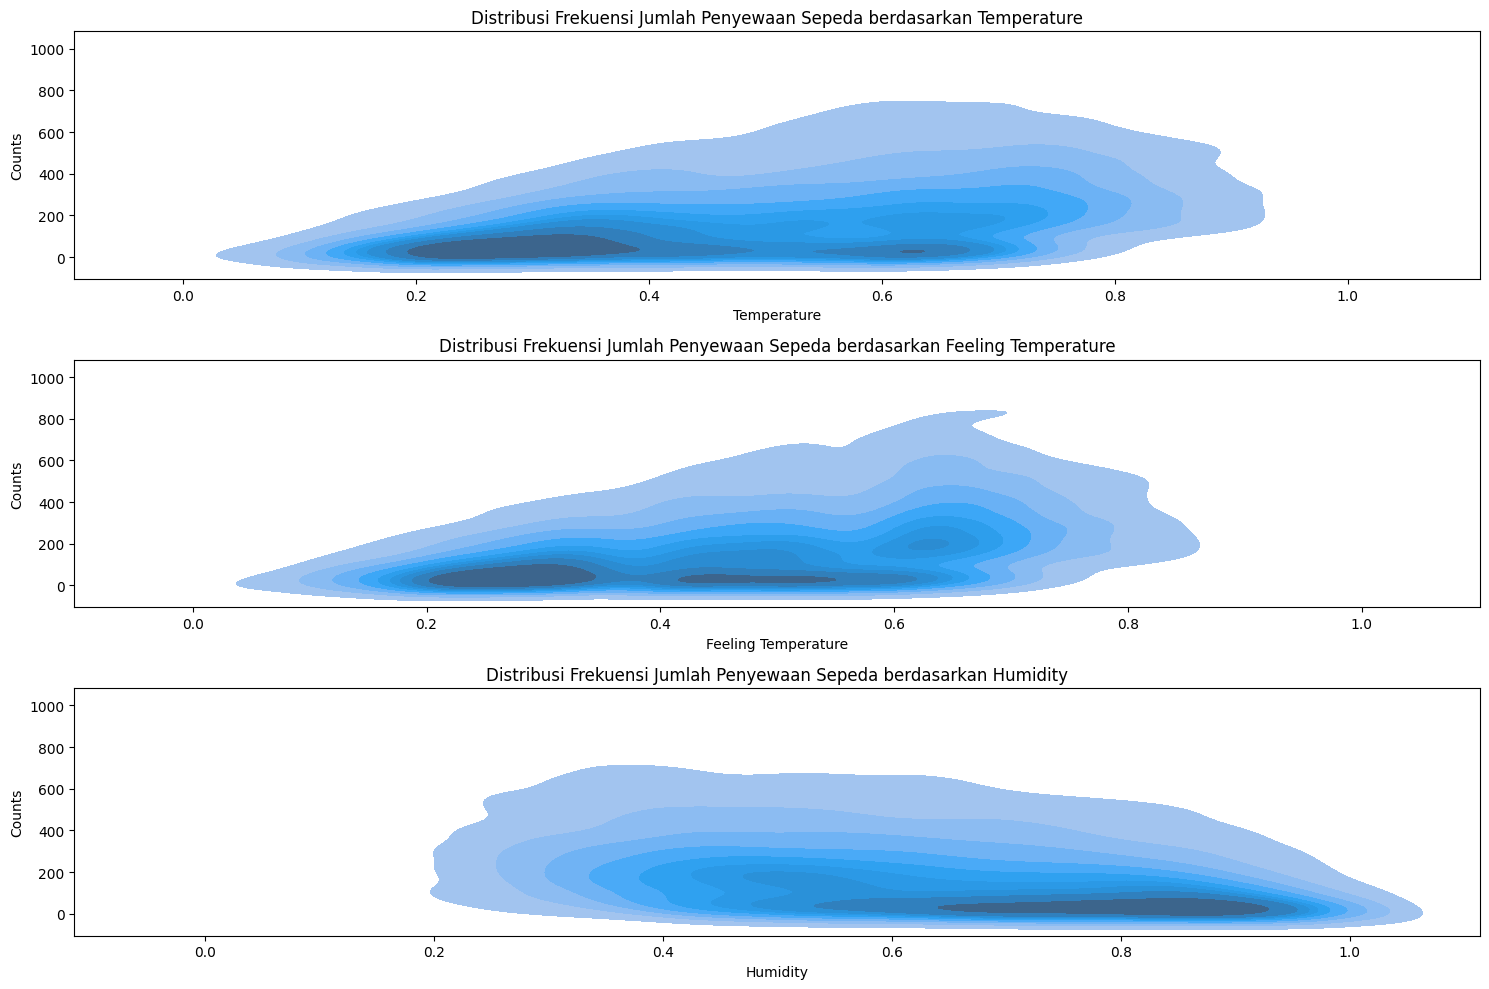

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

sns.kdeplot(
    x='temp',
    y='count',
    data=hour_df,
    ax=axes[0],
    fill=True
)
axes[0].set_title('Distribusi Frekuensi Jumlah Penyewaan Sepeda berdasarkan Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Counts')

sns.kdeplot(
    x='atemp',
    y='count',
    data=hour_df,
    ax=axes[1],
    fill=True
)
axes[1].set_title('Distribusi Frekuensi Jumlah Penyewaan Sepeda berdasarkan Feeling Temperature')
axes[1].set_xlabel('Feeling Temperature')
axes[1].set_ylabel('Counts')

sns.kdeplot(
    x='hum',
    y='count',
    data=hour_df,
    ax=axes[2],
    fill=True
)
axes[2].set_title('Distribusi Frekuensi Jumlah Penyewaan Sepeda berdasarkan Humidity')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Counts')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi diatas menggunakan kdeplot, dapat disimpulkan beberapa pernyataan yaitu:


*   Pada distribusi penyewaan sepeda berdasarkan temperature didapatkan penyewa sepeda terbanyak pada temperature 0.6, tetapi temperature yang sering didapatkan berkisar dari 0.2 hingga 0.4
*   Pada distribusi penyewaan sepeda berdasarkan feeling temperature didapatkan penyewa sepeda terbanyak pada feeling temperature 0.7, tetapi feeling temperature yang sering didapatkan berkisar 0.2 hingga 0.3 dan 0.4 hingga 0.5
*   Pada distribusi penyewaan sepeda berdasarkan humidity didapatkan penyewa sepeda terbanyak pada humidity 0.3 hingga 0.4, tetapi humidity yang sering didapatkan berkisar 0.7 hingga 0.85



### Pertanyaan 4: Apakah ada pola penggunaan sepeda yang dipengaruhi oleh musim, baik itu oleh pengguna sepeda casual maupun yang terdaftar (registered)?

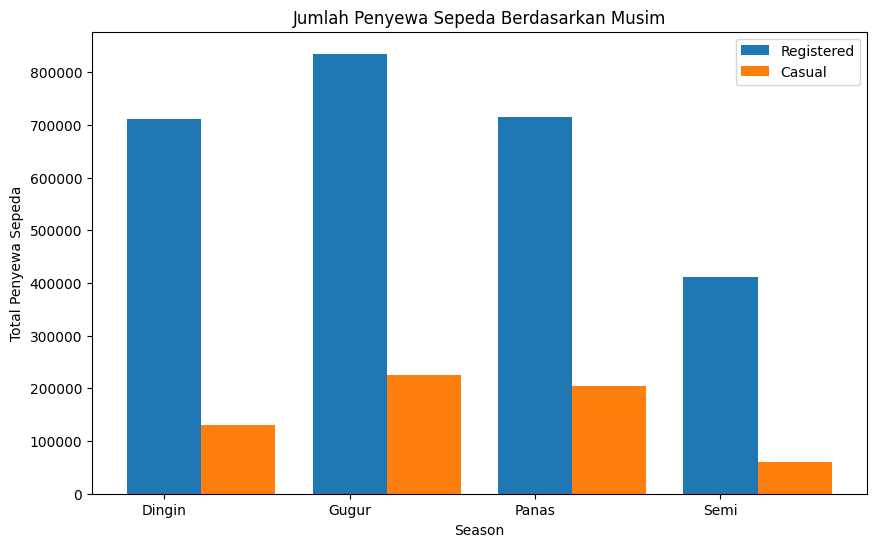

In [33]:
seasonal_usage = hour_df.groupby('season')[['registered', 'casual']].sum().reset_index()
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar_position_reg = [1, 2, 3, 4]
bar_position_cas = [x + bar_width for x in bar_position_reg]

plt.bar(
    bar_position_reg,
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue',
    width=bar_width
)

plt.bar(
    bar_position_cas,
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange',
    width=bar_width
)

plt.xlabel('Season')
plt.ylabel('Total Penyewa Sepeda')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')

season_labels = sorted(hour_df['season'].unique())
plt.xticks(bar_position_reg, season_labels)

plt.legend()
plt.show()


Berdasarkan visualisasi diatas menggunakan bar, didapatkan kesimpulan di semua musim yang paling diminati oleh penyewa sepeda (casual dan registered) adalah musim Gugur, dengan diikuti oleh musim Panas, musim Dingin, dan terakhir musim Semi.

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi data menggunakan lineplot, terlihat bahwa pola penyewaan sepeda berkaitan erat dengan konteks waktu seperti hari kerja, hari libur, dan hari dalam seminggu. Pada hari kerja, terdapat dua puncak tingkat penyewaan sepeda pada sekitar jam 08:00 dan 17:00, dengan penurunan pada rentang jam 10:00 hingga 15:00. Sedangkan pada hari bukan kerja, terdapat puncak tingkat penyewaan sepeda pada rentang jam 12:00 hingga 15:00. Selain itu, pada hari libur, terlihat peningkatan penyewaan sepeda pada jam 17:00. Analisis ini memberikan gambaran yang jelas tentang preferensi pengguna sepeda terkait waktu dalam sehari dan hari dalam seminggu.
- Conclution pertanyaan 2 : Berdasarkan visualisasi menggunakan lineplot, dapat disimpulkan bahwa terjadi peningkatan jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012. Tercatat bahwa sepanjang periode Januari hingga Desember, tahun 2012 secara konsisten menunjukkan jumlah penyewaan sepeda yang lebih tinggi atau unggul dibandingkan dengan tahun 2011. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sedangkan pada tahun 2011, puncak penyewaan terjadi pada bulan Juni. Selain itu, terlihat bahwa bulan Januari menjadi bulan dengan jumlah penyewaan sepeda paling rendah baik pada tahun 2011 maupun 2012. Analisis ini menggambarkan tren pertumbuhan yang positif dari tahun ke tahun serta mengidentifikasi bulan-bulan dengan tingkat penyewaan tertinggi dan terendah dalam rentang waktu yang dianalisis.
- Conclution pertanyaan 3 : Berdasarkan visualisasi menggunakan kdeplot, beberapa insight dapat diambil terkait distribusi penyewaan sepeda berdasarkan variabel suhu, feeling temperature, dan kelembapan. Pertama, terlihat bahwa jumlah penyewa sepeda terbanyak terjadi pada rentang suhu sekitar 0.6, meskipun suhu yang paling umum ditemui berkisar antara 0.2 hingga 0.4. Kedua, distribusi penyewaan sepeda berdasarkan feeling temperature menunjukkan puncak tertinggi pada nilai sekitar 0.7, meskipun feeling temperature yang sering ditemui lebih berkisar antara 0.2 hingga 0.3 dan 0.4 hingga 0.5. Terakhir, dalam hal kelembapan, penyewa sepeda paling banyak terjadi pada rentang kelembapan antara 0.3 hingga 0.4, namun kelembapan yang sering dijumpai berkisar antara 0.7 hingga 0.85. Analisis ini memberikan gambaran yang lebih komprehensif tentang preferensi pengguna sepeda terkait dengan faktor-faktor cuaca.
- Conclution pertanyaan 4 : Berdasarkan visualisasi menggunakan bar plot, dapat disimpulkan bahwa musim yang paling diminati oleh penyewa sepeda, baik kategori casual maupun registered, adalah musim Gugur. Hal ini terlihat dari jumlah total penyewaan yang tertinggi pada musim Gugur dibandingkan dengan musim lainnya. Diikuti oleh musim Panas yang memiliki jumlah penyewaan yang cukup tinggi, kemudian musim Dingin, dan terakhir adalah musim Semi. Analisis ini menunjukkan preferensi penyewaan sepeda yang lebih tinggi pada musim Gugur, kemungkinan karena kondisi cuaca yang lebih nyaman dan berbagai aktivitas luar ruangan yang tersedia pada musim tersebut.





